In [1]:
what_were_covering = {1: "Data (prepare and load",
                      2: "build model",
                      3: "fit the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}


{1: 'Data (prepare and load',
 2: 'build model',
 3: 'fit the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn #building blocks for Neural Networks
import matplotlib.pyplot as plt


In [5]:
# Data (preparing and loading)
# Y = a + bX
weight = 0.7   #b
bias = 0.3     #a

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:5], y[:5]

# (tensor([[0.0000],
#          [0.0200],
#          [0.0400],
#          [0.0600],
#          [0.0800]]),
#  tensor([[0.3000],
#          [0.3140],
#          [0.3280],
#          [0.3420],
#          [0.3560]]))

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [6]:
len(X), len(y)
#(50, 50)

(50, 50)

In [8]:
# Create a training and test set with our data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split] #40 training samples of X and y
X_test, y_test = X[train_split:], y[train_split:] #10 testing samples of X and y

len(X_train), len(y_train), len(X_test), len(y_test)
#(40, 40, 10, 10)

(40, 40, 10, 10)

In [13]:
import matplotlib.pyplot as plt

# Function to visualize data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    #Plots training data, test data, and compares predictions

    #Plot training data in blue
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

    #Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label='Test data')

    #Are there predictions?
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', labels='Predictions')

    plt.legend(prop={"size": 14})

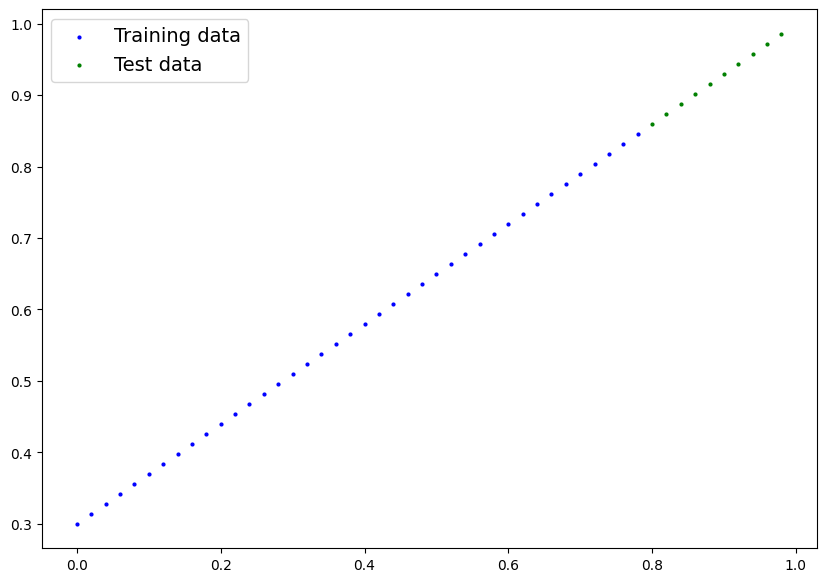

In [14]:
plot_predictions()

In [ ]:
class LinearRegressionModel(nn.Module): #<- almost everything in PyTorch inherits nn.Module
    def __init__(self):
        super().__init__()
        #Start with RANDOM numbers and continually update these to fit the data
        #we set the weights and bias with randn (random number)
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        #Forward method to define the computation in the model
        def forward(self, x:torch.Tensor) -> torch.Tensor:
            return self.weights * x + self.bias # y = m*x + b